In [1]:
import pycircos
import seaborn as sns
import patchworklib as pw 
import matplotlib.pyplot as plt
from Bio import SeqIO
pw.overwrite_axisgrid()
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

<Figure size 72x72 with 0 Axes>

In [2]:
#Set chromosomes
circle = Gcircle(fig=pw.Brick._figure) 
with open("sample_data/example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc) 

In [3]:
circle.set_garcs(-65,245) 

In [4]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_chromosome_cytoband.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])   

In [5]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(860,940), facecolor="orangered", spine=True) 

In [6]:
#line plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.lineplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                    rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,850), linecolor="royalblue", spine=False) 

In [7]:
#bar plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_barplot.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:  
    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                   raxis_range=[680,760], facecolor="y", spine=True)

In [8]:
#heatmap
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_rect_gradual.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.heatmap(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[630,670], vmin=vmin, vmax=vmax, 
                   cmap=plt.cm.viridis)

In [9]:
#linkplot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_links.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name1  = line[0]     
        start1 = int(line[1])-1
        end1   = int(line[2])
        name2  = line[3]     
        start2 = int(line[4])-1
        end2   = int(line[5])
        source = (name1, start1, end1, 630)
        destination = (name2, start2, end2, 630)
        circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor)

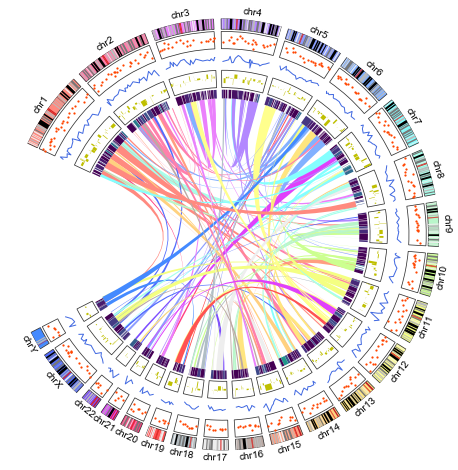

In [10]:
circos1 = pw.cBrick(ax=circle.ax)
circos1.savefig()

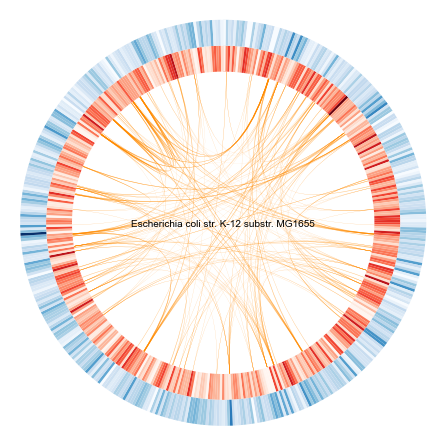

In [11]:
record = SeqIO.read("sample_data/NC_000913.gbk", format="genbank")
garc   = Garc(arc_id="NC_000913.3", record=record, interspace=0, linewidth=0, 
              facecolor="#FFFFFF00", raxis_range=(0,10), 
              label="Escherichia coli str. K-12 substr. MG1655", label_visible=True)
gcircle = Gcircle(fig=pw.Brick._figure)
gcircle.add_garc(garc)
gcircle.set_garcs()


#calc CDS density
plus_CDS  = [] 
minus_CDS = [] 
for feat in garc.record.features:
    if feat.type == "CDS" and feat.strand >= 0:
        plus_CDS.append((feat.location.parts[0].start, feat.location.parts[-1].end))
    elif feat.strand == -1:
        minus_CDS.append((feat.location.parts[-1].start, feat.location.parts[0].end))
plus_density  = garc.calc_density(plus_CDS, window_size=10000)
minus_density = garc.calc_density(minus_CDS, window_size=10000)
gcircle.heatmap("NC_000913.3", plus_density,  raxis_range=(700,820), cmap=plt.cm.Reds)
gcircle.heatmap("NC_000913.3", minus_density, raxis_range=(820,940), cmap=plt.cm.Blues)

#cord plot
import collections
chord_dict = collections.defaultdict(list)
with open("sample_data/segdup.txt","r") as f:
    for line in f:
        line          = line.rstrip().split("\t")
        chord_dict[line[0]].append((line[1], int(line[2]), int(line[3]), 700)) 
        
for key in chord_dict:
    gcircle.chord_plot(chord_dict[key][0], chord_dict[key][1], facecolor="#ff8c0080")

circos2 = pw.cBrick(ax=gcircle.ax)
circos2.savefig()

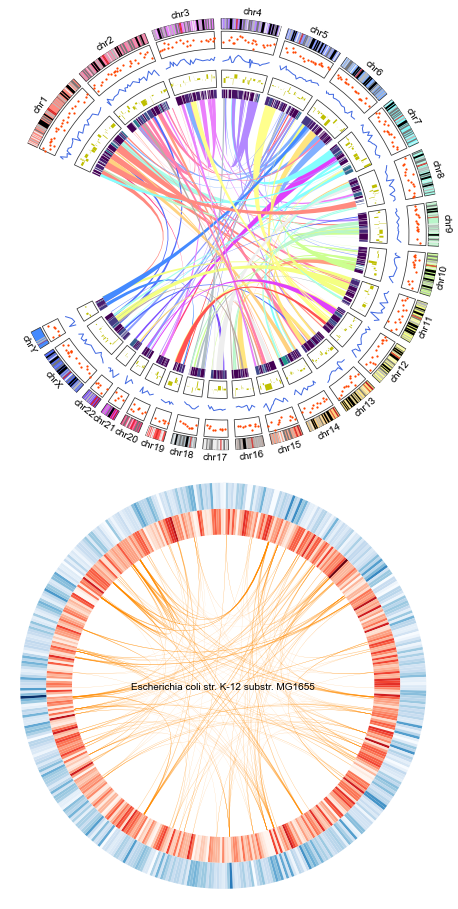

In [12]:
pw.param["margin"] = 0.1 #I recommend margin size is 0.1 when arranging polor plots.
circos12 = (circos1/circos2)
circos12.savefig()

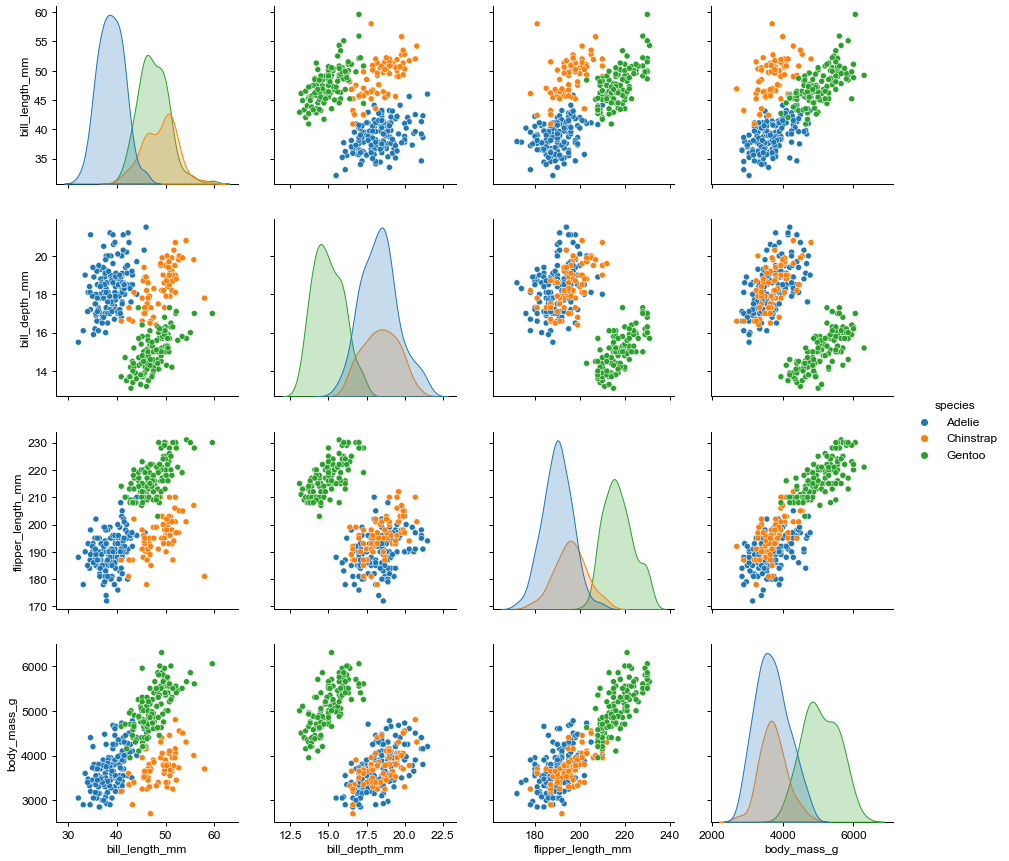

In [13]:
df = sns.load_dataset("penguins")
g  = sns.pairplot(df, hue="species")
g  = pw.load_seaborngrid(g, figsize=(15,15))
g.savefig()

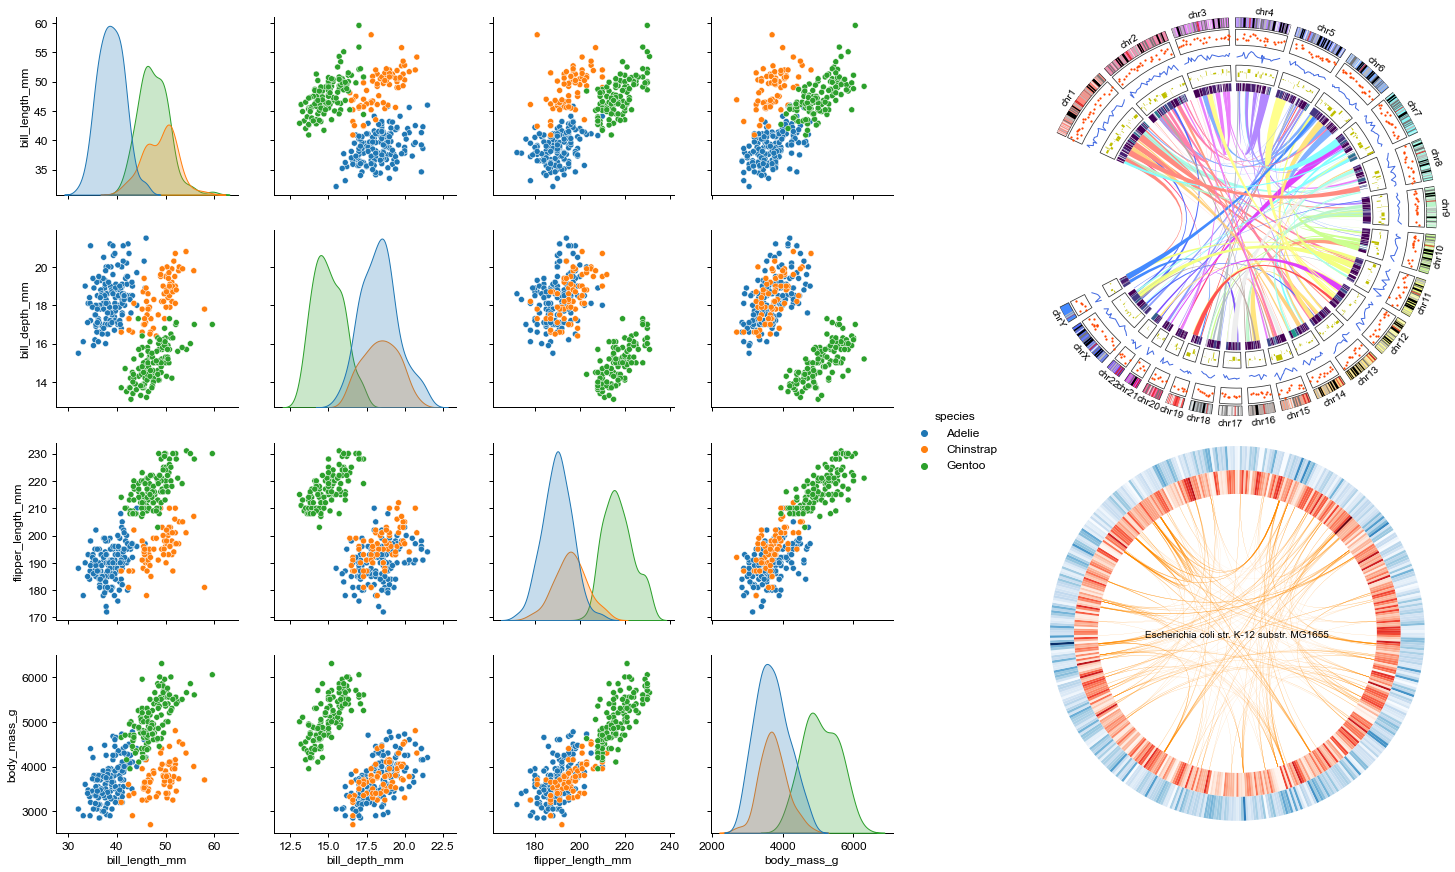

In [15]:
pw.param["margin"] = 0.5
(g|circos12).savefig("../img/pycircos_patchwork.png")